# 다층 퍼셉트론으로 MNIST 분류하기

앞서 소프트맥스 회귀로 MNIST 데이터를 분류하는 실습을 해봤습니다. 소프트맥스 회귀 또한 인공 신경망이라고 볼 수 있는데, 입력층과 출력층만 존재하므로 소프트맥스 함수를 활성화 함수로 사용한 '단층 퍼셉트론'이라고 할 수 있습니다. 이번 챕터에서는 은닉층을 추가로 넣어 다층 퍼셉트론을 구현하고, 딥 러닝을 통해서 MNIST 데이터를 분류해봅시다.

## 데이터 로드 및 확인

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

# for reproducibility
# 랜덤 시드를 고정!
random.seed(777)
torch.manual_seed(777)

In [ ]:
#MNIST dataset download
mnist_train = dsets.MNIST(root= "MNIST_datat", 
                          train = True, transform= transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root= "MNIST_datat", 
                          train = False, transform= transforms.ToTensor(), download=True)

print(len(mnist_train))
nb_epochs = 15
batch_size = 100

#dataset loader로 data batch크기만큼 로드
data_loader = DataLoader(dataset=mnist_train, batch_size = batch_size, shuffle = True, drop_last = True)
print(len(data_loader))
# for x_train, y_train in enumerate(data_loader):
#   print(x_train, y_train)

60000
600


## 모델 설계 및 학습

In [ ]:
#모델 설계
#이미지는 아래와 같이 28 픽셀 × 28 픽셀의 이미지 ->  28 픽셀 × 28 픽셀 = 784 픽셀이므로, 각 이미지를 총 784의 원소를 가진 벡터로 만들어줄겁니다.
#-> 총 784개의 특성을 가진 샘플이 된다.
# input_dim은 784이고, output_dim은 10(0-9)

class MNISTClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.MLP = nn.Sequential(
            nn.Linear(784, 100),
            nn.ReLU(),
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Linear(100,10)
        ) 

    def forward(self, x):
        return self.MLP(x)

model = MNISTClassifier()

#비용함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

#training
for epoch in range(nb_epochs): # 앞서 nb_epochs 값은 15로 지정함.
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader: #batch
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28) #X는 for문에서 호출될 때는 (배치 크기 × 1 × 28 × 28)의 크기를 가지지만, view를 통해서 (배치 크기 × 784)의 크기로 변환
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.246898845
Epoch: 0002 cost = 0.132980362
Epoch: 0003 cost = 0.114462219
Epoch: 0004 cost = 0.097506411
Epoch: 0005 cost = 0.096031331
Epoch: 0006 cost = 0.092628293
Epoch: 0007 cost = 0.077000484
Epoch: 0008 cost = 0.084464818
Epoch: 0009 cost = 0.071390927
Epoch: 0010 cost = 0.067245118
Epoch: 0011 cost = 0.073159337
Epoch: 0012 cost = 0.067242496
Epoch: 0013 cost = 0.069765769
Epoch: 0014 cost = 0.066266902
Epoch: 0015 cost = 0.059250198
Learning finished


### TEST data로 예측

Accuracy: 0.9681000113487244
Label:  5
Prediction:  5


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


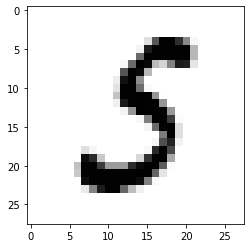

In [ ]:
# 테스트 데이터를 사용하여 모델을 테스트한다.

with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float()#.to(device)
    Y_test = mnist_test.test_labels#.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test #input tensor: prediction, dim = 1
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float()#.to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1]#.to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

# 이 방식대로 다시
https://wikidocs.net/61073

In [ ]:
#1. 데이터 로드하기
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [ ]:
len(mnist.data)
type(mnist.data) #pandas.core.frame.DataFrame
# mnist.data[0] -> ERROR

'''
 Since 0.24.0 (December 2020), as_frame argument of fetch_openml is set to auto (instead of False as default option earlier) which gives you a pandas.DataFrame for the MNIST data. You can force the data read as a numpy.ndarray by setting as_frame = False.
'''
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame= False)
type(mnist.data) #numpy.ndarray

numpy.ndarray

In [ ]:
print(type(mnist.data)) #numpy.ndarray
print(mnist.data[0])
print(mnist.target[0])

<class 'numpy.ndarray'>
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   

In [ ]:
print(type(mnist.target[0])) #<class 'str'>
#str -> int
mnist.target = mnist.target.astype(np.int8)

X = mnist.data / 255 ## 0-255값을 [0,1] 구간으로 정규화
y = mnist.target

<class 'str'>


이 이미지 데이터의 레이블은 5이다


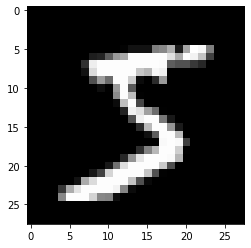

In [ ]:
# 이미지 확인
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다".format(y[0]))

### 훈련 데이터와 테스트 데이터 분리

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)


#### 다층 퍼셉트론

In [ ]:
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100,100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100,10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
from torch import optim

#오차함수 선택
loss_fn = nn.CrossEntropyLoss()

#가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr = 0.01)



In [ ]:
def train(epoch):
  model.train() #신경망을 학습 모드로 전환

  # 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
  for data, targets in loader_train:

      optimizer.zero_grad()  # 경사를 0으로 초기화
      outputs = model(data)  # 데이터를 입력하고 출력을 계산
      loss = loss_fn(outputs, targets)  # 출력과 훈련 데이터 정답 간의 오차를 계산
      loss.backward()  # 오차를 역전파 계산
      optimizer.step()  # 역전파 계산한 값으로 가중치를 수정

  print("epoch{}：완료\n".format(epoch))


In [ ]:
def test():
    model.eval()  # 신경망을 추론 모드로 전환
    correct = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad():  # 추론 과정에는 미분이 필요없음
        for data, targets in loader_test:

            outputs = model(data)  # 데이터를 입력하고 출력을 계산

            # 추론 계산
            _, predicted = torch.max(outputs.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

    # 정확도 출력
    data_num = len(loader_test.dataset)  # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [ ]:
#without train, test result
test()


테스트 데이터에서 예측 정확도: 963/10000 (10%)



In [ ]:
#after train(epoch = 3), test result
for epoch in range(3):
    train(epoch)

test()

epoch0：완료

epoch1：완료

epoch2：완료


테스트 데이터에서 예측 정확도: 9562/10000 (96%)



예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다


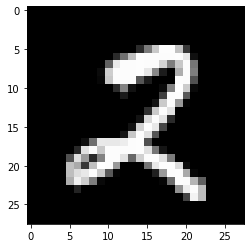

In [ ]:
index = 2018

model.eval()  # 신경망을 추론 모드로 전환
data = X_test[index]
output = model(data)  # 데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 0)  # 확률이 가장 높은 레이블이 무엇인지 계산

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))